In [56]:
import pandas as pd

test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

In [57]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [58]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style for better visuals
sns.set(style="whitegrid")

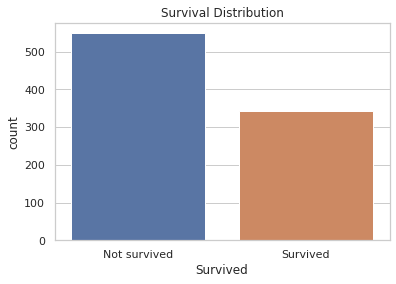

In [61]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=train_data)
plt.title('Survival Distribution')
plt.xticks([0, 1], ['Not survived', 'Survived'])
plt.show()

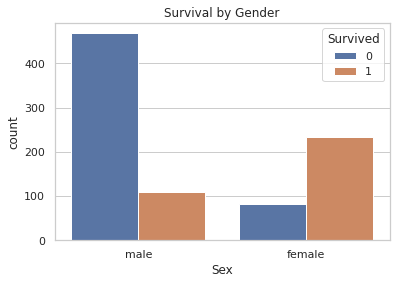

In [62]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title('Survival by Gender')
plt.show()

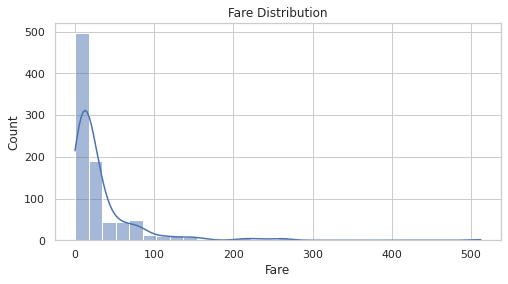

In [63]:
plt.figure(figsize=(8, 4))
sns.histplot(train_data['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()

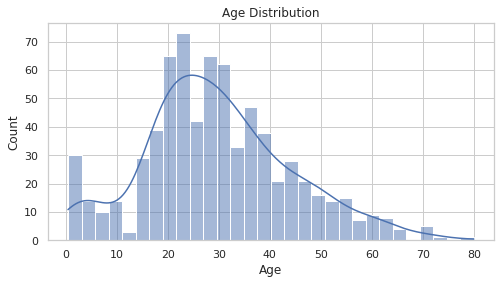

In [64]:
plt.figure(figsize=(8,4))
sns.histplot(train_data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

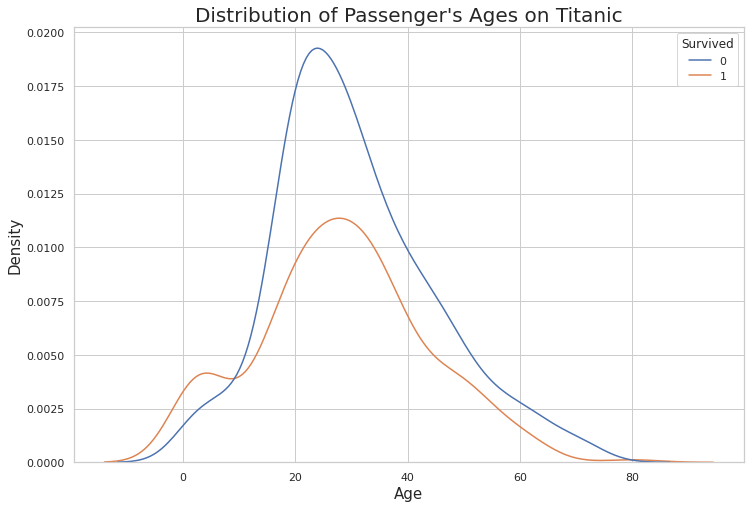

In [65]:
plt.figure(figsize=(12,8))
ax = sns.kdeplot(data=train_data, x="Age", hue='Survived')
ax.set_xlabel('Age',fontsize = 15)
ax.set_ylabel('Density',fontsize = 15)
ax.set_title("Distribution of Passenger's Ages on Titanic",fontsize = 20)
plt.show()

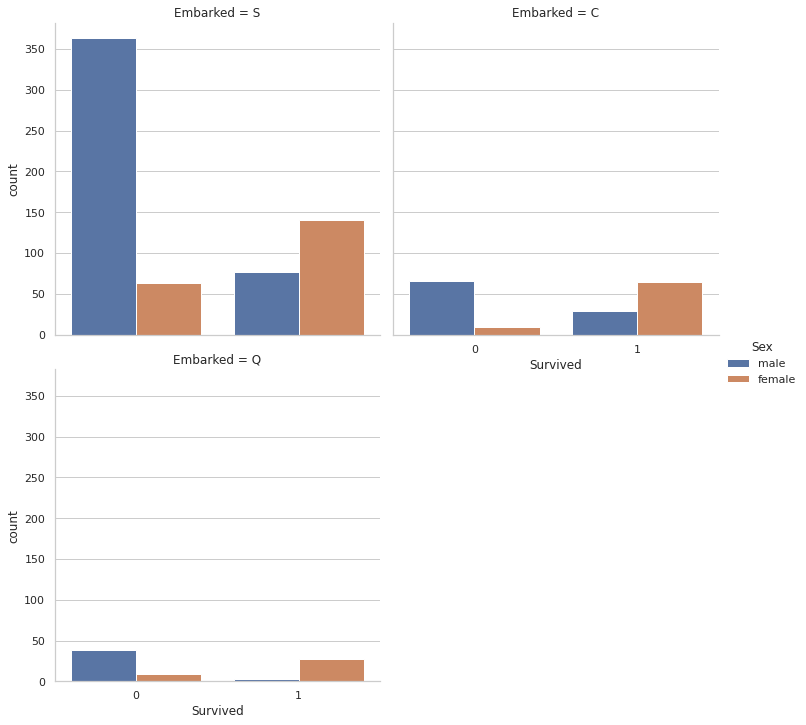

In [66]:
sns.catplot(data=train_data, x="Survived", col="Embarked", hue='Sex', kind="count", col_wrap=2)
plt.show()

In [67]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

In [68]:
np.random.seed(27)
# Fill missing values for 'Age' with the median
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

# Fill missing values for 'Embarked' with the most common value
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

# Fill missing values for 'Fare' with the median
train_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

# Convert 'Sex' and 'Embarked' to numerical values
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})
train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [69]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']
X_val = train_data[features]
y_val = train_data['Survived']

In [70]:
tree_model = DecisionTreeClassifier(random_state=1, max_depth=3) #increase max_depth
tree_model = tree_model.fit(X_val, y_val) #use 0.7 split

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_val, y_val, test_size=0.8,random_state=100)
forest_model = RandomForestClassifier(n_estimators=100, random_state=100) 
forest_model = forest_model.fit(X_train2, y_train2) #try with forest_model.fit(X_val, y_val)

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model = knn_model.fit(X_train2, y_train2) #try knn_model.fit(X_train2, y_train2)

In [73]:
X_new = test_data[features]
X_new.describe()
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [74]:
#X_train2, X_val2, y_train2, y_val2 = train_test_split(X_val, y_val, test_size=0.8,random_state=100) -> use this as base

In [75]:
predict_decisiontree = tree_model.predict(X_new) #do a test/train split

In [76]:
predict_forest = forest_model.predict(X_new) #doesn't work X_test(?)

In [77]:
predict_neighbors = knn_model.predict(X_new)

In [78]:
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": predict_neighbors
    })
#submission.to_csv('submission6.csv', index=False)

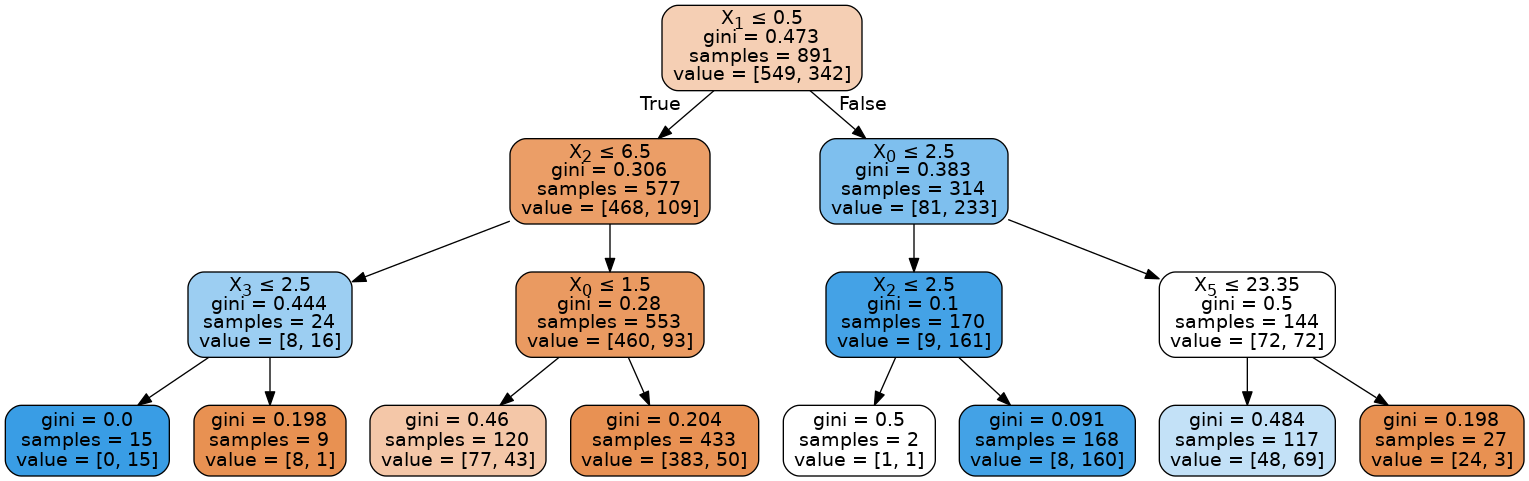

In [79]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
%matplotlib inline

# Let’s examine the tree
dot_data = StringIO()
export_graphviz(tree_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [41]:
# from sklearn import metrics
# y_val.describe()
# predict_decisiontree.info()
#cm = metrics.confusion_matrix(y_val,predict_decisiontree)
#print(cm)

# accuracy = metrics.accuracy_score(y_val, predict_decisiontree)
# print(accuracy)

# precision = metrics.precision_score(y_val, predict_decisiontree)
# print(precision)

# recall = metrics.recall_score(y_val, predict_decisiontree)
# print(recall)

In [ ]:
#linear regression model -> next

In [ ]:
#random variations (change random_state) generate

In [ ]:
#do cross validation 5 fold on density tree